# Applied Deep Learning - a use case based approach to understand deep neural networks

### Umberto Michelucci

Buy the book: https://www.apress.com/us/book/9781484237892

(C) Umberto Michelucci 2018-2019 - umberto.michelucci@gmail.com 

github repository: https://github.com/Apress/applied-deep-learning

# Staircase decay

In [3]:
import numpy as np
import matplotlib.pyplot as plt

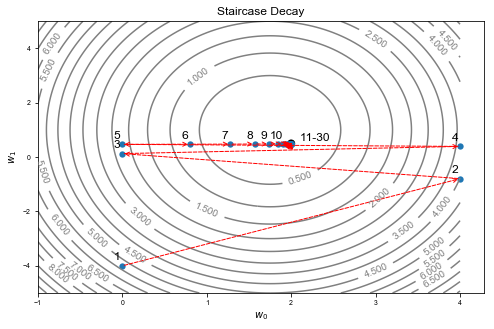

In [469]:
import numpy as np
import matplotlib.pyplot as plt

# The data to fit
m = 30
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(figsize=(8, 5))

plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[:,np.newaxis,np.newaxis],
                   theta1_grid[np.newaxis,:,np.newaxis])

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax.contour(X, Y, J_grid, 20, colors='gray')
ax.clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax.scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 30
alpha0 = 2
theta = [np.array((0,-4))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    # Let's decrease the learning rate
    
    if (j < 4):
        alpha = alpha0
    elif j>=4:
        alpha = alpha0/5.0
    
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))
    
 
colors = ['b', 'g', 'm', 'c', 'orange']
for j in range(1,N):
    ax.annotate('', xy=theta[j], xytext=theta[j-1], 
                arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1,'ls': 'dashed'}, va='center', ha='center')
    if (j <= 10):
        ax.annotate(j, xy=theta[j], xytext=theta[j-1]+[-0.1,0.2],fontsize=12) 
ax.annotate('11-30', xy=[2,0.5], xytext=[2.1,0.6],fontsize=12) 

ax.scatter(*zip(*theta), cmap='gray', s=40, lw=0, label = r"Time decay $\alpha = 0.2$")

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_title(r'Staircase Decay')
plt.show()



# Step decay

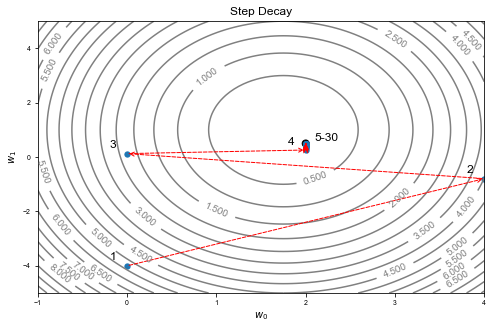

In [468]:
import numpy as np
import matplotlib.pyplot as plt

# The data to fit
m = 30
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(figsize=(8, 5))
#ax[0].scatter(x, y, marker='x', s=40, color='k')
#fig = plt.figure(figsize=(3.9, 3.1))

plt.rc('font', family='arial')
    #plt.rc('font',**{'family':'serif','serif':['Palatino']}) 
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[:,np.newaxis,np.newaxis],
                   theta1_grid[np.newaxis,:,np.newaxis])

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax.contour(X, Y, J_grid, 20, colors='gray')
ax.clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax.scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 30
alpha0 = 2
theta = [np.array((0,-4))]
J = [cost_func(*theta[0])[0]]

epochs_drop = 2

for j in range(N-1):
    # Let's decrease the learning rate
    
    alpha = alpha0 / (np.floor(j/epochs_drop)+1)
    
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))
    
 
colors = ['b', 'g', 'm', 'c', 'orange']
for j in range(1,N):
    ax.annotate('', xy=theta[j], xytext=theta[j-1], 
                arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1,'ls': 'dashed'}, va='center', ha='center')
    if (j <= 4):
        ax.annotate(j, xy=theta[j], xytext=theta[j-1]+[-0.2,0.2],fontsize=12) 
ax.annotate('5-30', xy=[2,0.5], xytext=[2.1,0.6],fontsize=12) 

ax.scatter(*zip(*theta), cmap='gray', s=40, lw=0, label = r"Step decay $\alpha = 0.2$")

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_title(r'Step Decay')
ax.set_xlim(-1,4)
plt.show()



# Inversal Time Decay

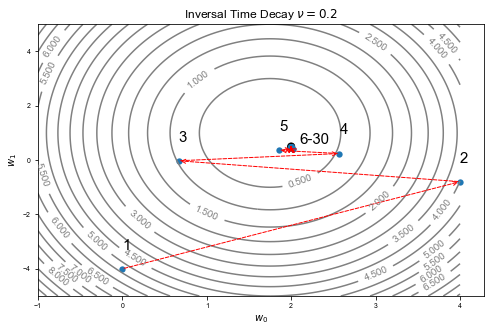

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# The data to fit
m = 30
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(figsize=(8, 5))
#ax[0].scatter(x, y, marker='x', s=40, color='k')
#fig = plt.figure(figsize=(3.9, 3.1))

plt.rc('font', family='arial')
    #plt.rc('font',**{'family':'serif','serif':['Palatino']}) 
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[:,np.newaxis,np.newaxis],
                   theta1_grid[np.newaxis,:,np.newaxis])

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax.contour(X, Y, J_grid, 20, colors='gray')
ax.clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax.scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 30
alpha0 = 2
theta = [np.array((0,-4))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    # Let's decrease the learning rate
    
    alpha = alpha0*1.0/(1.0+0.2*j)
    
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))
    

# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
#ax[0].plot(x, hypothesis(x, *theta[0]), color=colors[0], lw=2,
#           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
for j in range(1,N):
    ax.annotate('', xy=theta[j], xytext=theta[j-1], 
                arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1,'ls': 'dashed'}, va='center', ha='center')
    if (j <= 5):
        ax.annotate(j, xy=theta[j], xytext=theta[j-1]+[0.0,0.7],fontsize=15) 
    #ax[0].plot(x, hypothesis(x, *theta[j]), color=colors[j], lw=2,
    #       label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[j]))
ax.annotate('6-30', xy=[2,0.5], xytext=[2.1,0.6],fontsize=15) 

ax.scatter(*zip(*theta), cmap='gray', s=40, lw=0, label = r"Time decay $\alpha = 0.2$")


# Labels, titles and a legend.
ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_title(r'Inversal Time Decay $\nu=0.2$')

plt.show()



## Inversal Time Decay for bigger values of $\nu$

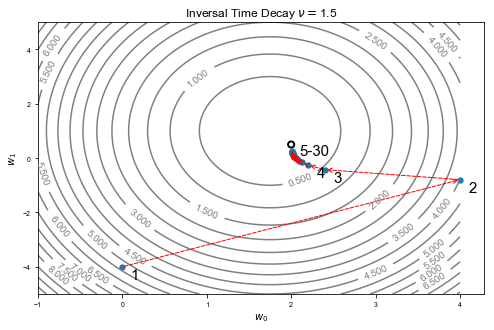

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# The data to fit
m = 30
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(figsize=(8, 5))
#ax[0].scatter(x, y, marker='x', s=40, color='k')
#fig = plt.figure(figsize=(3.9, 3.1))

plt.rc('font', family='arial')
    #plt.rc('font',**{'family':'serif','serif':['Palatino']}) 
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[:,np.newaxis,np.newaxis],
                   theta1_grid[np.newaxis,:,np.newaxis])

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax.contour(X, Y, J_grid, 20, colors='gray')
ax.clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax.scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 30
alpha0 = 2
theta = [np.array((0,-4))]
nu = 1.5
J2 = [cost_func(*theta[0])[0]]
for j in range(N-1):
    # Let's decrease the learning rate
    
    alpha = alpha0*1.0/(1.0+nu*j)
    
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J2.append(cost_func(*this_theta))
    


# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
for j in range(1,N):
    ax.annotate('', xy=theta[j], xytext=theta[j-1], 
                arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1,'ls': 'dashed'}, va='center', ha='center')
    if (j <= 4):
        ax.annotate(j, xy=theta[j], xytext=theta[j-1]+[0.1,-0.45],fontsize=15) 
ax.annotate('5-30', xy=[2,0.5], xytext=[2.1,0.1],fontsize=15) 

ax.scatter(*zip(*theta), cmap='gray', s=40, lw=0, label = r"Time decay $\alpha =$"+str(nu))


# Labels, titles and a legend.
ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_title(r'Inversal Time Decay $\nu=$'+str(nu))
plt.show()



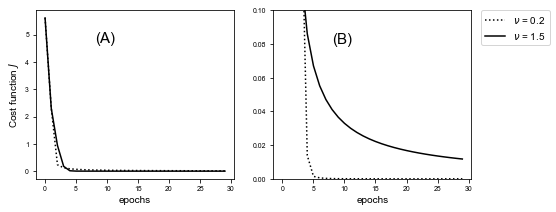

In [6]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(7.8, 3.1))
ax = fig.add_subplot(1, 2, 1)
ax.plot(J, ls='solid', color = 'black', label = r'$\nu$ = 0.2')
ax.plot(J2, ls='dotted', color = 'black', label = r'$\nu$ = 0.5')
ax.set_xlabel('epochs')
ax.text(8,4.7,'(A)' , fontsize = 15)
ax.set_ylabel('Cost function $J$')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


ax = fig.add_subplot(1, 2 ,2)

#fig = plt.figure(figsize=(3.9, 3.1))
#ax = fig.add_subplot(1, 1, 1)
ax.plot(J, ls='dotted', color = 'black', label = r'$\nu$ = 0.2')
ax.text(8,0.08,'(B)' , fontsize = 15)
ax.plot(J2, ls='solid', color = 'black', label = r'$\nu$ = 1.5')
ax.set_xlabel('epochs')
#ax.set_ylabel('Cost function $J$')
plt.ylim (0,0.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

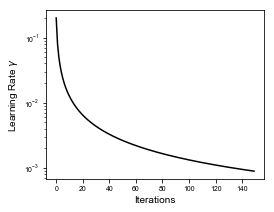

In [341]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

alpha0 = 0.2
nu = 1.5
t = np.arange(0,150, 1)
gamma = alpha0*1.0/(1.0+nu*t)

fig = plt.figure(figsize=(3.9, 3.1))
ax = fig.add_subplot(1, 1, 1)
ax.semilogy(gamma, ls='solid', color = 'black')
ax.set_xlabel('Iterations')
ax.set_ylabel('Learning Rate $\gamma$')

# Exponential Decay

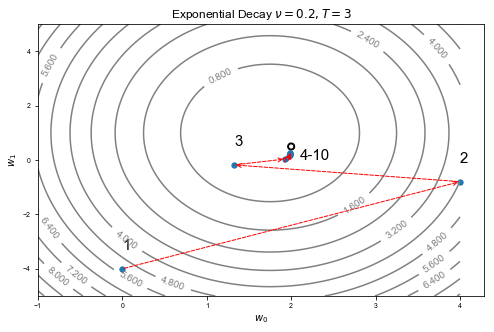

In [484]:
import numpy as np
import matplotlib.pyplot as plt

# The data to fit
m = 30
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(figsize=(8, 5))

plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[:,np.newaxis,np.newaxis],
                   theta1_grid[np.newaxis,:,np.newaxis])

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax.contour(X, Y, J_grid, 15, colors='gray')
ax.clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax.scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 10
alpha0 = 2

nu = 0.2
T = 4

theta = [np.array((0,-4))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    # Let's decrease the learning rate
    
    alpha = alpha0*nu**(j/T)
    
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))
    
# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
#ax[0].plot(x, hypothesis(x, *theta[0]), color=colors[0], lw=2,
#           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
for j in range(1,N):
    ax.annotate('', xy=theta[j], xytext=theta[j-1], 
                arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1,'ls': 'dashed'}, va='center', ha='center')
    if (j <=3):
        ax.annotate(j, xy=theta[j], xytext=theta[j-1]+[0.0,0.7],fontsize=15) 
ax.annotate('4-10', xy=[2,0.5], xytext=[2.1,0],fontsize=15) 
ax.scatter(*zip(*theta), cmap='gray', s=40, lw=0, label = r"Time decay $\alpha = 0.2$")


# Labels, titles and a legend.
ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_title(r'Exponential Decay $\nu=0.2, T = 3$')
plt.show()



# Natural Exponential decay

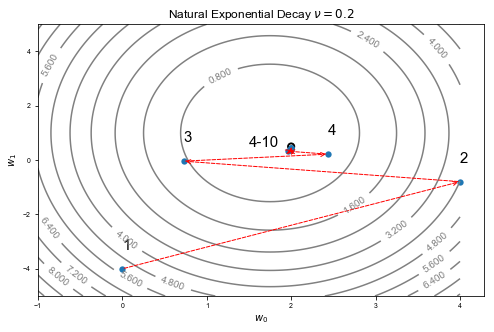

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# The data to fit
m = 30
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(figsize=(8, 5))

plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[:,np.newaxis,np.newaxis],
                   theta1_grid[np.newaxis,:,np.newaxis])

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax.contour(X, Y, J_grid, 15, colors='gray')
ax.clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax.scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 10
alpha0 = 2

nu = 0.2
T = 4

theta = [np.array((0,-4))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    # Let's decrease the learning rate
    
    alpha = alpha0*np.exp(-nu*j)
    
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))
    
# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
#ax[0].plot(x, hypothesis(x, *theta[0]), color=colors[0], lw=2,
#           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
for j in range(1,N):
    ax.annotate('', xy=theta[j], xytext=theta[j-1], 
                arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1,'ls': 'dashed'}, va='center', ha='center')
    if (j <=4):
        ax.annotate(j, xy=theta[j], xytext=theta[j-1]+[0.0,0.7],fontsize=15) 
ax.annotate('4-10', xy=[2,0.5], xytext=[1.5,0.5],fontsize=15) 
ax.scatter(*zip(*theta), cmap='gray', s=40, lw=0, label = r"Time decay $\alpha = 0.2$")



# Labels, titles and a legend.
ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_title(r'Natural Exponential Decay $\nu=0.2$')
plt.show()



# Natural Exponential decay for several $\nu$

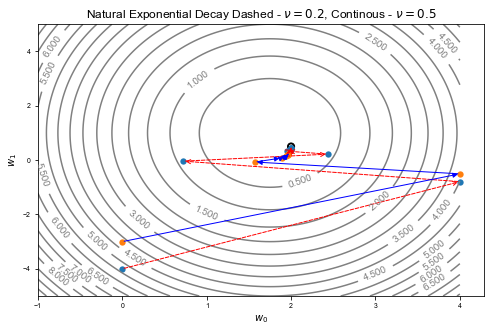

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# The data to fit
m = 30
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(figsize=(8, 5))

plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[:,np.newaxis,np.newaxis],
                   theta1_grid[np.newaxis,:,np.newaxis])

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax.contour(X, Y, J_grid, 20, colors='gray')
ax.clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax.scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 10
alpha0 = 2

nu = 0.2
T = 4

theta = [np.array((0,-4))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    # Let's decrease the learning rate
    
    alpha = alpha0*np.exp(-nu*j)
    
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))
    
    
#N = 15
alpha0 = 2
theta1 = [np.array((0,-3))]
J = [cost_func(*theta1[0])[0]]
for j in range(N-1):
   # Let's decrease the learning rate
    
    alpha = alpha0*np.exp(-0.5*j)
    
    last_theta = theta1[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta1.append(this_theta)
    J.append(cost_func(*this_theta))


# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
#ax[0].plot(x, hypothesis(x, *theta[0]), color=colors[0], lw=2,
#           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
for j in range(1,N):
    ax.annotate('', xy=theta[j], xytext=theta[j-1], 
                arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1,'ls': 'dashed'}, va='center', ha='center')
ax.scatter(*zip(*theta), cmap='gray', s=40, lw=0, label = r"Time decay $\alpha = 0.2$")


for j in range(1,N):
    ax.annotate('', xy=theta1[j], xytext=theta1[j-1],
                   arrowprops={'arrowstyle': '-|>', 'color': 'b', 'lw': 1, 'ls': 'solid'},
                   va='center', ha='center')
ax.scatter(*zip(*theta1), cmap='gray', s=40, lw=0, label = r"Exponential decay $\alpha = 0.5$")


# Labels, titles and a legend.
ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_title(r'Natural Exponential Decay $\nu=0.2$')
ax.set_title(r'Natural Exponential Decay Dashed - $\nu=0.2$, Continous - $\nu = 0.5$')

plt.show()



# ZOOM around the minimum

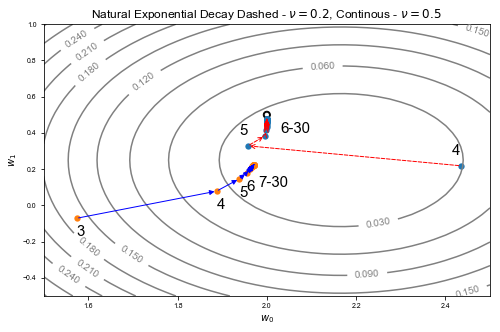

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# The data to fit
m = 30
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(figsize=(8, 5))

#plt.subplot(1,2,1)

plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(1.5,2.5,41)
theta1_grid = np.linspace(-.5,1,41)
J_grid = cost_func(theta0_grid[:,np.newaxis,np.newaxis],
                   theta1_grid[np.newaxis,:,np.newaxis])

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax.contour(X, Y, J_grid, 10,  colors='gray') #colors='gray',
ax.clabel(contours, inline = True)
# The target parameter values indicated on the cost function contour plot
ax.scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 30
alpha0 = 2

nu = 0.2
T = 4

theta = [np.array((0,-4))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    # Let's decrease the learning rate
    
    alpha = alpha0*np.exp(-nu*j)
    
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))
    
    
#N = 15
alpha0 = 2
theta1 = [np.array((0,-3))]
J2 = [cost_func(*theta1[0])[0]]
for j in range(N-1):
   # Let's decrease the learning rate
    
    alpha = alpha0*np.exp(-0.5*j)
    
    last_theta = theta1[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta1.append(this_theta)
    J2.append(cost_func(*this_theta))

Ninit = 3
# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
#ax[0].plot(x, hypothesis(x, *theta[0]), color=colors[0], lw=2,
#           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
for j in range(Ninit+1,N):
    ann = ax.annotate('', xy=theta[j], xytext=theta[j-1], 
                arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1,'ls': 'dashed'}, va='center', ha='center',
                annotation_clip=False)

    ann.arrow_patch.set_clip_box(ax.bbox)
    if (j <=5):
        ax.annotate(j, xy=theta[j], xytext=theta[j-1]+[-0.02,0.06],fontsize=15)
ax.annotate('6-30', xy=[2,0.4], xytext=[2.03,0.4],fontsize=15) 
ax.scatter(*zip(*theta), cmap='gray', s=40, lw=0, label = r"Time decay $\alpha = 0.2$")


for j in range(Ninit,N):
    ann = ax.annotate('', xy=theta1[j], xytext=theta1[j-1],
                   arrowprops={'arrowstyle': '-|>', 'color': 'b', 'lw': 1},
                   va='center', ha='center',
                annotation_clip=False)
    ann.arrow_patch.set_clip_box(ax.bbox)
    if (j <=6):
        ax.annotate(j, xy=theta1[j], xytext=theta1[j-1]+[0.0,-0.1],fontsize=15)
ax.annotate('7-30', xy=[2,0.1], xytext=[1.98,0.1],fontsize=15) 
ax.scatter(*zip(*theta1), cmap='gray', s=40, lw=0, label = r"Exponential decay $\alpha = 0.5$")


ax.set_xlim(1.5,2.5)
ax.set_ylim(-.5,1)
# Labels, titles and a legend.
ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_title(r'Natural Exponential Decay Dashed - $\nu=0.2$, Continous - $\nu = 0.5$')
plt.show()



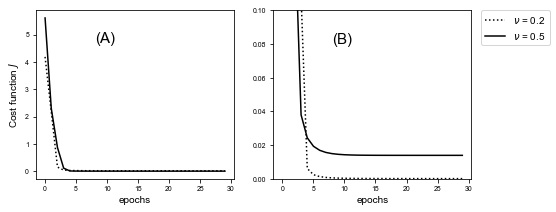

In [494]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(7.8, 3.1))
ax = fig.add_subplot(1, 2, 1)
ax.plot(J, ls='solid', color = 'black', label = r'$\nu$ = 0.2')
ax.plot(J2, ls='dotted', color = 'black', label = r'$\nu$ = 0.5')
ax.set_xlabel('epochs')
ax.text(8,4.7,'(A)' , fontsize = 15)
ax.set_ylabel('Cost function $J$')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


ax = fig.add_subplot(1, 2 ,2)

#fig = plt.figure(figsize=(3.9, 3.1))
#ax = fig.add_subplot(1, 1, 1)
ax.plot(J, ls='dotted', color = 'black', label = r'$\nu$ = 0.2')
ax.text(8,0.08,'(B)' , fontsize = 15)
ax.plot(J2, ls='solid', color = 'black', label = r'$\nu$ = 0.5')
ax.set_xlabel('epochs')
#ax.set_ylabel('Cost function $J$')
plt.ylim (0,0.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#fig.savefig('Figure_1-19'+'.pdf', format='pdf', dpi=300,bbox_inches='tight')
fig.savefig('Figure_4-13'+'.png', format='png', dpi=300,bbox_inches='tight')

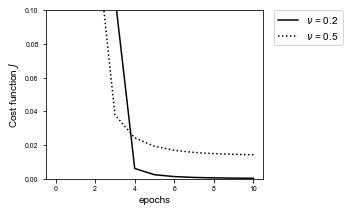

In [147]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()


fig = plt.figure(figsize=(3.9, 3.1))
ax = fig.add_subplot(1, 1, 1)
ax.plot(J, ls='solid', color = 'black', label = r'$\nu$ = 0.2')
ax.plot(J2, ls='dotted', color = 'black', label = r'$\nu$ = 0.5')
ax.set_xlabel('epochs')
ax.set_ylabel('Cost function $J$')
plt.ylim (0,0.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Plot for many iterations

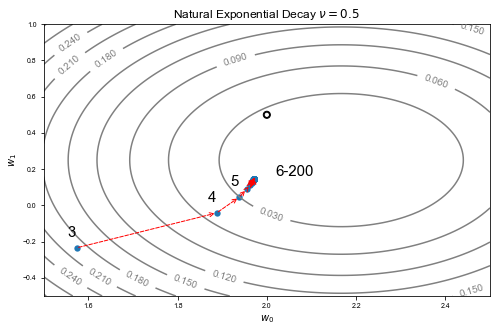

In [495]:
import numpy as np
import matplotlib.pyplot as plt

# The data to fit
m = 30
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(figsize=(8, 5))

#plt.subplot(1,2,1)

plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(1.5,2.5,101)
theta1_grid = np.linspace(-.5,1,101)
J_grid = cost_func(theta0_grid[:,np.newaxis,np.newaxis],
                   theta1_grid[np.newaxis,:,np.newaxis])

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax.contour(X, Y, J_grid, 10,  colors='gray') #colors='gray',
ax.clabel(contours, inline = True)
# The target parameter values indicated on the cost function contour plot
ax.scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 200
alpha0 = 2

nu = 0.5
T = 4

theta = [np.array((0,-4))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    # Let's decrease the learning rate
    
    alpha = alpha0*np.exp(-nu*j)
    
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))
    
  
Ninit = 2
# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
#ax[0].plot(x, hypothesis(x, *theta[0]), color=colors[0], lw=2,
#           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
for j in range(Ninit+1,N):
    ann = ax.annotate('', xy=theta[j], xytext=theta[j-1], 
                arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1,'ls': 'dashed'}, va='center', ha='center',
                annotation_clip=False)

    ann.arrow_patch.set_clip_box(ax.bbox)
    if (j <=5):
        ax.annotate(j, xy=theta[j], xytext=theta[j-1]+[-0.02,0.06],fontsize=15)
ax.annotate('6-200', xy=[2,0.4], xytext=[2.02,0.16],fontsize=15) 
ax.scatter(*zip(*theta), cmap='gray', s=40, lw=0, label = r"Time decay $\alpha = 0.2$")


ax.set_xlim(1.5,2.5)
ax.set_ylim(-.5,1)
# Labels, titles and a legend.
ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_title(r'Natural Exponential Decay $\nu = 0.5$')
plt.show()



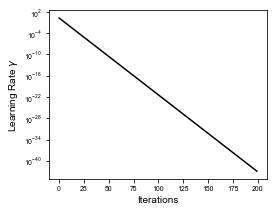

In [496]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

nu = 0.5
t = np.arange(0, 200, 1)
gamma = alpha0*np.exp(-nu*t)

fig = plt.figure(figsize=(3.9, 3.1))
ax = fig.add_subplot(1, 1, 1)
ax.semilogy(gamma, ls='solid', color = 'black')
ax.set_xlabel('Iterations')
ax.set_ylabel('Learning Rate $\gamma$')

# Comparison of decay of learning rate

In [4]:
nu1 = 0.01
nu2 = 0.1
nu3 = 0.8
alpha0 = 2
epochs_drop1 = 10
epochs_drop2 = 20
epochs_drop3 = 50
T = 100
t = np.arange(0, 200, 1)

In [6]:
gamma_ned1 = alpha0*np.exp(-nu1*t)
gamma_itd1 = alpha0*1.0/(1.0+nu1*t)
gamma_ed1 = alpha0*nu1**(t/T)
gamma_sd1 = alpha0 / (np.floor(t/epochs_drop1 )+1)

gamma_ned2 = alpha0*np.exp(-nu2*t)
gamma_itd2 = alpha0*1.0/(1.0+nu2*t)
gamma_ed2 = alpha0*nu2**(t/T)
gamma_sd2 = alpha0 / (np.floor(t / epochs_drop2) +1)

gamma_ned3 = alpha0*np.exp(-nu3*t)
gamma_itd3 = alpha0*1.0/(1.0+nu3*t)
gamma_ed3 = alpha0*nu3**(t/T)
gamma_sd3 = alpha0 /  (np.floor(t / epochs_drop3) +1)

gamma_end = 0.05
gamma_pol = (alpha0-gamma_end)*(1-t/10)**0.5+gamma_end

C:\Users\umber\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt


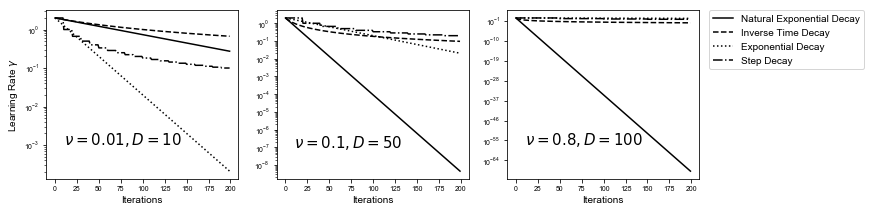

In [13]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

nu = 20
t = np.arange(0, 200, 1)

fig = plt.figure(figsize=(11.7, 3.1))
ax = fig.add_subplot(1, 3, 1)
ax.semilogy(gamma_ned1, ls='solid', color = 'black', label = 'Natural Exponential Decay')
ax.semilogy(gamma_itd1, ls='dashed', color = 'black', label = 'Inverse Time Decay')
ax.semilogy(gamma_ed1, ls='dotted', color = 'black', label = 'Exponential Decay')
ax.semilogy(gamma_sd1, ls='-.', color = 'black', label = 'Step Decay ($D=10$)')
ax.set_xlabel('Iterations')
ax.set_ylabel('Learning Rate $\gamma$')
ax.text (10, 1e-3, r'$\nu = 0.01, D=10$', fontsize = 15)



ax = fig.add_subplot(1, 3 ,2)

ax.semilogy(gamma_ned2, ls='solid', color = 'black', label = 'Natural Exponential Decay')
ax.semilogy(gamma_itd2, ls='dashed', color = 'black', label = 'Inverse Time Decay')
ax.semilogy(gamma_ed2, ls='dotted', color = 'black', label = 'Exponential Decay')
ax.semilogy(gamma_sd2, ls='-.', color = 'black', label = 'Step Decay')
ax.set_xlabel('Iterations')
ax.text (10, 1e-7, r'$\nu = 0.1, D=50$', fontsize = 15)

ax = fig.add_subplot(1, 3 ,3)

ax.semilogy(gamma_ned3, ls='solid', color = 'black', label = 'Natural Exponential Decay')
ax.semilogy(gamma_itd3, ls='dashed', color = 'black', label = 'Inverse Time Decay')
ax.semilogy(gamma_ed3, ls='dotted', color = 'black', label = 'Exponential Decay')
ax.semilogy(gamma_sd3, ls='-.', color = 'black', label = 'Step Decay')


ax.set_xlabel('Iterations')
ax.text (10, 1e-57, r'$\nu = 0.8, D = 100$', fontsize = 15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

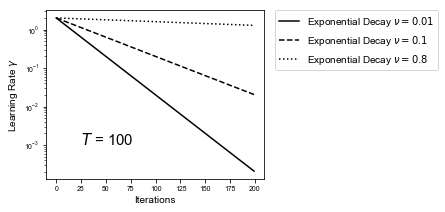

In [479]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

nu = 20
t = np.arange(0, 200, 1)

fig = plt.figure(figsize=(3.9, 3.1))
ax = fig.add_subplot(1, 1, 1)
ax.semilogy(gamma_ed1, ls='solid', color = 'black', label = r'Exponential Decay $\nu = 0.01$')
ax.semilogy(gamma_ed2, ls='dashed', color = 'black', label = r'Exponential Decay $\nu = 0.1$')
ax.semilogy(gamma_ed3, ls='dotted', color = 'black', label = r'Exponential Decay $\nu = 0.8$')
ax.set_xlabel('Iterations')
ax.set_ylabel('Learning Rate $\gamma$')
ax.text (25, 1e-3, r'$T$ = 100', fontsize = 15)
#plt.ylim (0,0.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

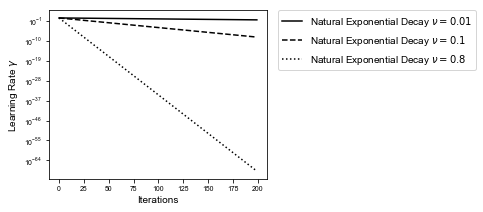

In [485]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

nu = 20
t = np.arange(0, 200, 1)

fig = plt.figure(figsize=(3.9, 3.1))
ax = fig.add_subplot(1, 1, 1)
ax.semilogy(gamma_ned1, ls='solid', color = 'black', label = r'Natural Exponential Decay $\nu = 0.01$')
ax.semilogy(gamma_ned2, ls='dashed', color = 'black', label = r'Natural Exponential Decay $\nu = 0.1$')
ax.semilogy(gamma_ned3, ls='dotted', color = 'black', label = r'Natural Exponential Decay $\nu = 0.8$')
ax.set_xlabel('Iterations')
ax.set_ylabel('Learning Rate $\gamma$')
#ax.text (25, 1e-4, r'$T$ = 100', fontsize = 15)
#plt.ylim (0,0.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

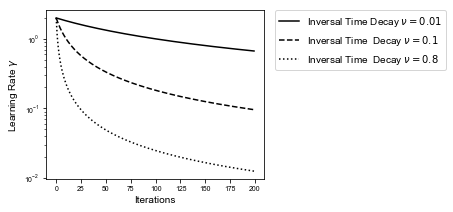

In [475]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

nu = 20
t = np.arange(0, 200, 1)

fig = plt.figure(figsize=(3.9, 3.1))
ax = fig.add_subplot(1, 1, 1)
ax.semilogy(gamma_itd1, ls='solid', color = 'black', label = r'Inversal Time Decay $\nu = 0.01$')
ax.semilogy(gamma_itd2, ls='dashed', color = 'black', label = r'Inversal Time  Decay $\nu = 0.1$')
ax.semilogy(gamma_itd3, ls='dotted', color = 'black', label = r'Inversal Time  Decay $\nu = 0.8$')
ax.set_xlabel('Iterations')
ax.set_ylabel('Learning Rate $\gamma$')
#ax.text (25, 1e-4, r'$T$ = 100', fontsize = 15)
#plt.ylim (0,0.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Figure 4-4

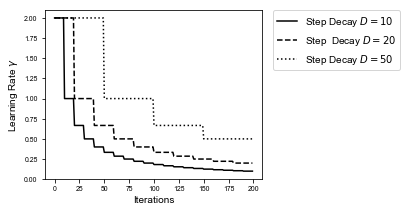

In [7]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

nu = 20
t = np.arange(0, 200, 1)

fig = plt.figure(figsize=(3.9, 3.1))
ax = fig.add_subplot(1, 1, 1)
ax.plot(gamma_sd1, ls='solid', color = 'black', label = r'Step Decay $D=10$')
ax.plot(gamma_sd2, ls='dashed', color = 'black', label = r'Step  Decay $D = 20$')
ax.plot(gamma_sd3, ls='dotted', color = 'black', label = r'Step Decay $D = 50$')
ax.set_xlabel('Iterations')
ax.set_ylabel('Learning Rate $\gamma$')
#ax.text (25, 1e-4, r'$T$ = 100', fontsize = 15)
#plt.ylim (0,0.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Figure 4-17 - staircase parameter

In [17]:
nu = 0.5
alpha0 = 0.5
decay_step = 20
t = np.arange(0, 200, 1)

In [18]:
gamma_itd1 = alpha0*1.0/(1.0+nu1*t/decay_step)
gamma_itd2 = alpha0*1.0/(1.0+nu1*np.floor(t/decay_step))

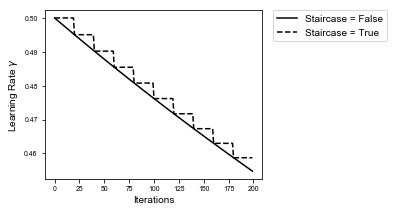

In [19]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

nu = 20
t = np.arange(0, 200, 1)

fig = plt.figure(figsize=(3.9, 3.1))
ax = fig.add_subplot(1, 1, 1)
ax.plot(gamma_itd1, ls='solid', color = 'black', label = r'Staircase = False')
ax.plot(gamma_itd2, ls='dashed', color = 'black', label = r'Staircase = True')
ax.set_xlabel('Iterations')
ax.set_ylabel('Learning Rate $\gamma$')
#ax.text (25, 1e-4, r'$T$ = 100', fontsize = 15)
#plt.ylim (0,0.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)